# Milestone 1: Exploratory Data Analysis and Data Preparation

## CelebA Dataset Analysis

This notebook performs comprehensive exploratory data analysis, data cleaning, and feature engineering on the CelebA dataset from torchvision.


## 1. Import Required Libraries


In [2]:
import torch
import torchvision
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)


PyTorch version: 2.5.1
Torchvision version: 0.20.1


## 2. Load the CelebA Dataset

CelebA is a large-scale face attributes dataset with more than 200,000 celebrity images, each annotated with 40 facial attributes.


In [3]:
import os

# Set the data directory
data_dir = './data'
os.makedirs(data_dir, exist_ok=True)

# Try to load the dataset
try:
    train_dataset = datasets.CelebA(root=data_dir, split='train', download=True)
    val_dataset = datasets.CelebA(root=data_dir, split='valid', download=True)
    test_dataset = datasets.CelebA(root=data_dir, split='test', download=True)
except:
    # If download fails, try loading from existing zip file
    print("Download failed, attempting to load from existing files...")
    train_dataset = datasets.CelebA(root=data_dir, split='train', download=False)
    val_dataset = datasets.CelebA(root=data_dir, split='valid', download=False)
    test_dataset = datasets.CelebA(root=data_dir, split='test', download=False)

print("Training dataset size:", len(train_dataset))
print("Validation dataset size:", len(val_dataset))
print("Test dataset size:", len(test_dataset))
print("Total images:", len(train_dataset) + len(val_dataset) + len(test_dataset))


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Training dataset size: 162770
Validation dataset size: 19867
Test dataset size: 19962
Total images: 202599


## 3. Exploratory Data Analysis (EDA)

### 3.1 Dataset Structure and Attribute Information


In [4]:
# Get attribute names from the dataset
attribute_names = train_dataset.attr_names
num_attributes = len(attribute_names)

# Filter out empty attribute names (dataset has 41 names but last one is empty, only 40 actual attributes)
filtered_attribute_names = [name for name in attribute_names if name.strip()]

print(f"Number of attributes: {num_attributes}")
print(f"Number of actual attributes (filtered): {len(filtered_attribute_names)}")
print(f"\nAll {len(filtered_attribute_names)} facial attributes:")
print("=" * 60)
for i, attr in enumerate(filtered_attribute_names):
    print(f"{i+1:2d}. {attr}")
    if (i+1) % 10 == 0:
        print()


Number of attributes: 41
Number of actual attributes (filtered): 40

All 40 facial attributes:
 1. 5_o_Clock_Shadow
 2. Arched_Eyebrows
 3. Attractive
 4. Bags_Under_Eyes
 5. Bald
 6. Bangs
 7. Big_Lips
 8. Big_Nose
 9. Black_Hair
10. Blond_Hair

11. Blurry
12. Brown_Hair
13. Bushy_Eyebrows
14. Chubby
15. Double_Chin
16. Eyeglasses
17. Goatee
18. Gray_Hair
19. Heavy_Makeup
20. High_Cheekbones

21. Male
22. Mouth_Slightly_Open
23. Mustache
24. Narrow_Eyes
25. No_Beard
26. Oval_Face
27. Pale_Skin
28. Pointy_Nose
29. Receding_Hairline
30. Rosy_Cheeks

31. Sideburns
32. Smiling
33. Straight_Hair
34. Wavy_Hair
35. Wearing_Earrings
36. Wearing_Hat
37. Wearing_Lipstick
38. Wearing_Necklace
39. Wearing_Necktie
40. Young



### 3.2 Sample Images Visualization


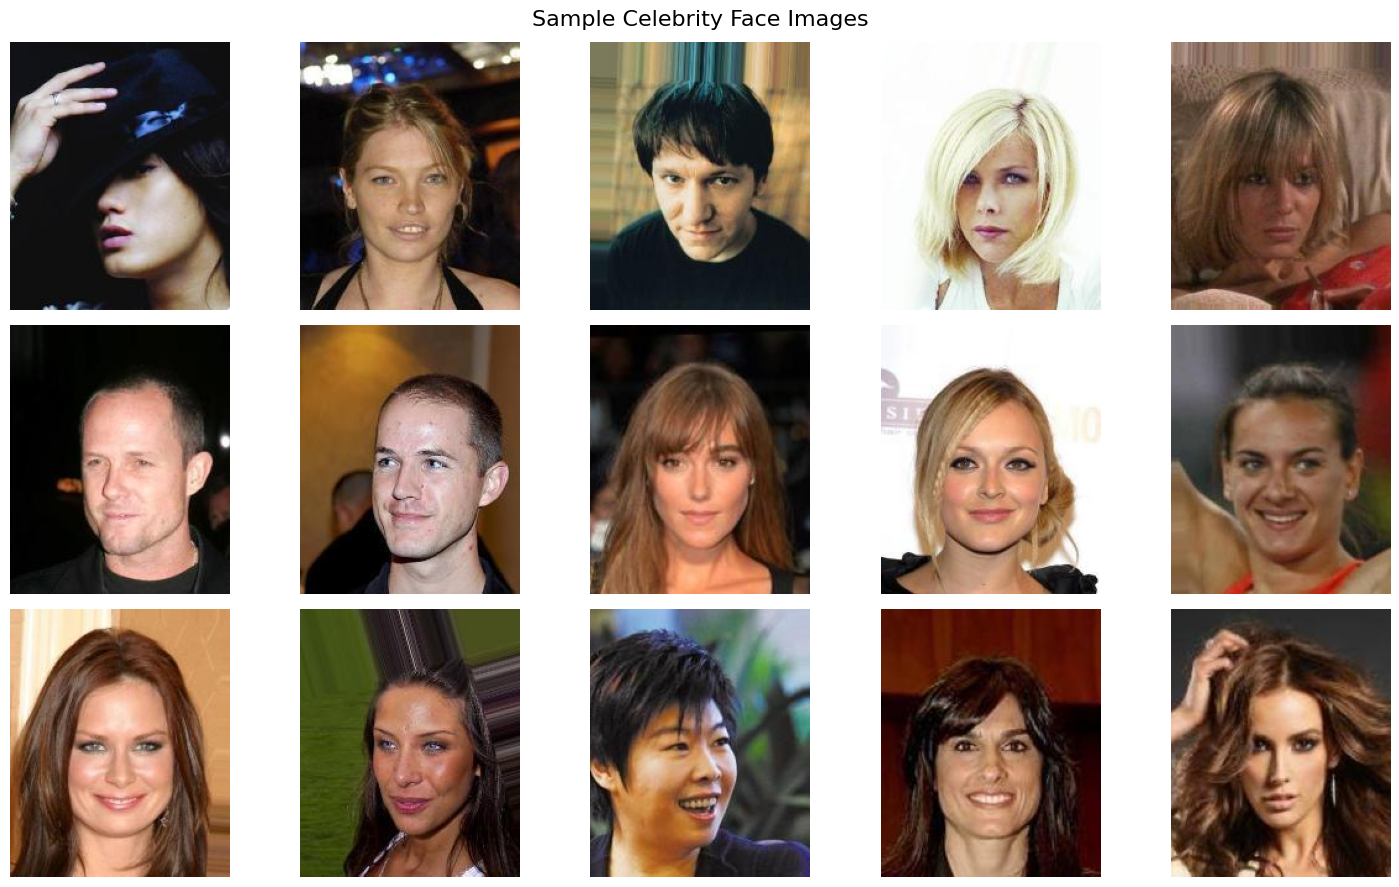

In [ ]:
# Display sample images
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('Sample Celebrity Face Images', fontsize=16)

# Select random images
random_indices = np.random.choice(len(train_dataset), 15, replace=False)

for idx, ax in enumerate(axes.flat):
    img, attrs = train_dataset[random_indices[idx]]
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()


### 3.3 Image Properties Analysis


In [6]:
# Analyze image properties
sample_size = 1000
widths = []
heights = []
aspect_ratios = []

print(f"Analyzing {sample_size} images...")

for i in range(sample_size):
    img, _ = train_dataset[i]
    width, height = img.size
    widths.append(width)
    heights.append(height)
    aspect_ratios.append(width / height)

print("\nImage Dimensions Statistics:")
print(f"Width - Min: {min(widths)}, Max: {max(widths)}, Mean: {np.mean(widths):.2f}")
print(f"Height - Min: {min(heights)}, Max: {max(heights)}, Mean: {np.mean(heights):.2f}")
print(f"Aspect Ratio - Min: {min(aspect_ratios):.2f}, Max: {max(aspect_ratios):.2f}, Mean: {np.mean(aspect_ratios):.2f}")


Analyzing 1000 images...

Image Dimensions Statistics:
Width - Min: 178, Max: 178, Mean: 178.00
Height - Min: 218, Max: 218, Mean: 218.00
Aspect Ratio - Min: 0.82, Max: 0.82, Mean: 0.82


### 3.4 Attribute Distribution Analysis


In [20]:
# Collect attributes from sample
sample_size = 5000
attributes_list = []

print(f"Collecting attributes from {sample_size} images...")

for i in range(sample_size):
    _, attrs = train_dataset[i]
    attributes_list.append(attrs.numpy())

attributes_array = np.array(attributes_list)


# Calculate positive counts for each attribute
positive_counts = (attributes_array == 1).sum(axis=0)
negative_counts = (attributes_array == -1).sum(axis=0)
positive_percentages = (positive_counts / sample_size) * 100

# Create dataframe (using filtered_attribute_names defined earlier)
attr_stats = pd.DataFrame({
    'Attribute': filtered_attribute_names,
    'Positive_Count': positive_counts,
    'Negative_Count': negative_counts,
    'Positive_Percentage': positive_percentages
})

print("\nAttribute Statistics (Top 10 most common):")
print(attr_stats.sort_values('Positive_Percentage', ascending=False).head(10))



Attribute Statistics (Top 10 most common):
              Attribute  Positive_Count  Negative_Count  Positive_Percentage
24             No_Beard            4161               0                83.22
39                Young            3913               0                78.26
2            Attractive            2561               0                51.22
31              Smiling            2406               0                48.12
21  Mouth_Slightly_Open            2389               0                47.78
36     Wearing_Lipstick            2356               0                47.12
19      High_Cheekbones            2232               0                44.64
20                 Male            2083               0                41.66
18         Heavy_Makeup            1926               0                38.52
33            Wavy_Hair            1550               0                31.00


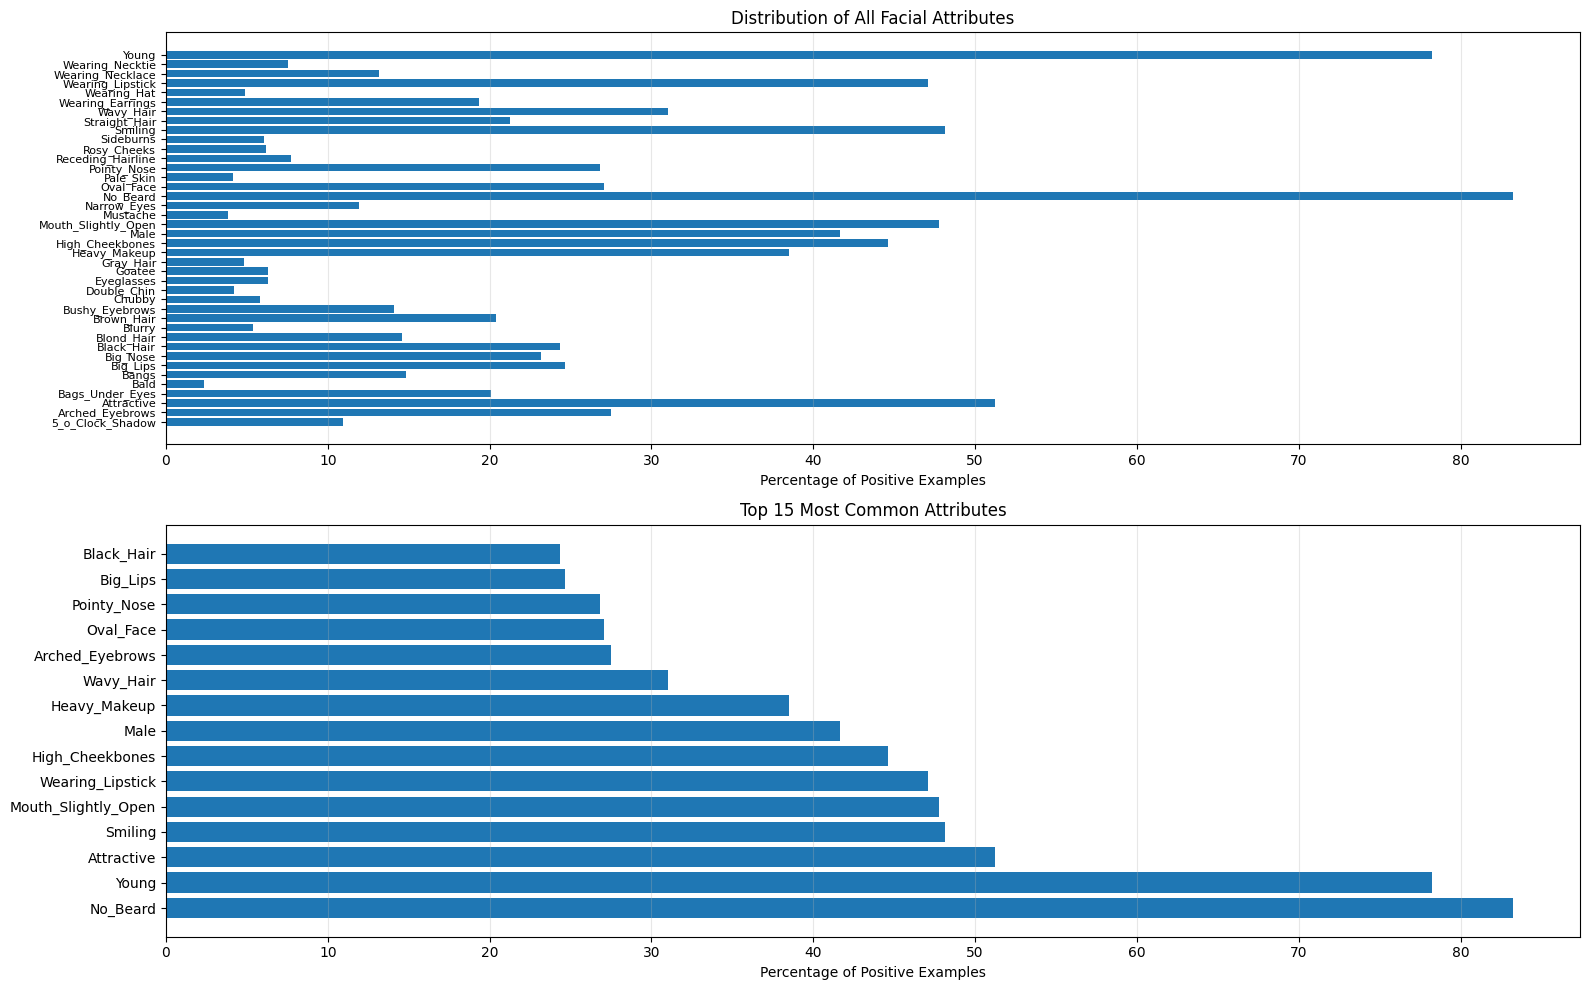

In [9]:
# Visualize attribute distribution
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# All attributes
num_filtered_attributes = len(filtered_attribute_names)
axes[0].barh(range(num_filtered_attributes), positive_percentages)
axes[0].set_yticks(range(num_filtered_attributes))
axes[0].set_yticklabels(filtered_attribute_names, fontsize=8)
axes[0].set_xlabel('Percentage of Positive Examples')
axes[0].set_title('Distribution of All Facial Attributes')
axes[0].grid(axis='x', alpha=0.3)

# Top 15 most common attributes
top_15 = attr_stats.sort_values('Positive_Percentage', ascending=False).head(15)
axes[1].barh(range(15), top_15['Positive_Percentage'].values)
axes[1].set_yticks(range(15))
axes[1].set_yticklabels(top_15['Attribute'].values)
axes[1].set_xlabel('Percentage of Positive Examples')
axes[1].set_title('Top 15 Most Common Attributes')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


### 3.5 Pixel Value Distribution Analysis


In [10]:
# Analyze pixel values
sample_size = 100
r_values = []
g_values = []
b_values = []

print(f"Analyzing pixel values from {sample_size} images...")

for i in range(sample_size):
    img, _ = train_dataset[i]
    img_array = np.array(img)
    
    r_values.extend(img_array[:, :, 0].flatten())
    g_values.extend(img_array[:, :, 1].flatten())
    b_values.extend(img_array[:, :, 2].flatten())

r_values = np.array(r_values)
g_values = np.array(g_values)
b_values = np.array(b_values)

print("\nPixel Value Statistics (0-255 range):")
print(f"Red Channel - Mean: {r_values.mean():.2f}, Std: {r_values.std():.2f}")
print(f"Green Channel - Mean: {g_values.mean():.2f}, Std: {g_values.std():.2f}")
print(f"Blue Channel - Mean: {b_values.mean():.2f}, Std: {b_values.std():.2f}")


Analyzing pixel values from 100 images...

Pixel Value Statistics (0-255 range):
Red Channel - Mean: 130.80, Std: 79.22
Green Channel - Mean: 109.15, Std: 72.21
Blue Channel - Mean: 97.57, Std: 72.50


### 3.6 Visualize Images with Specific Attributes


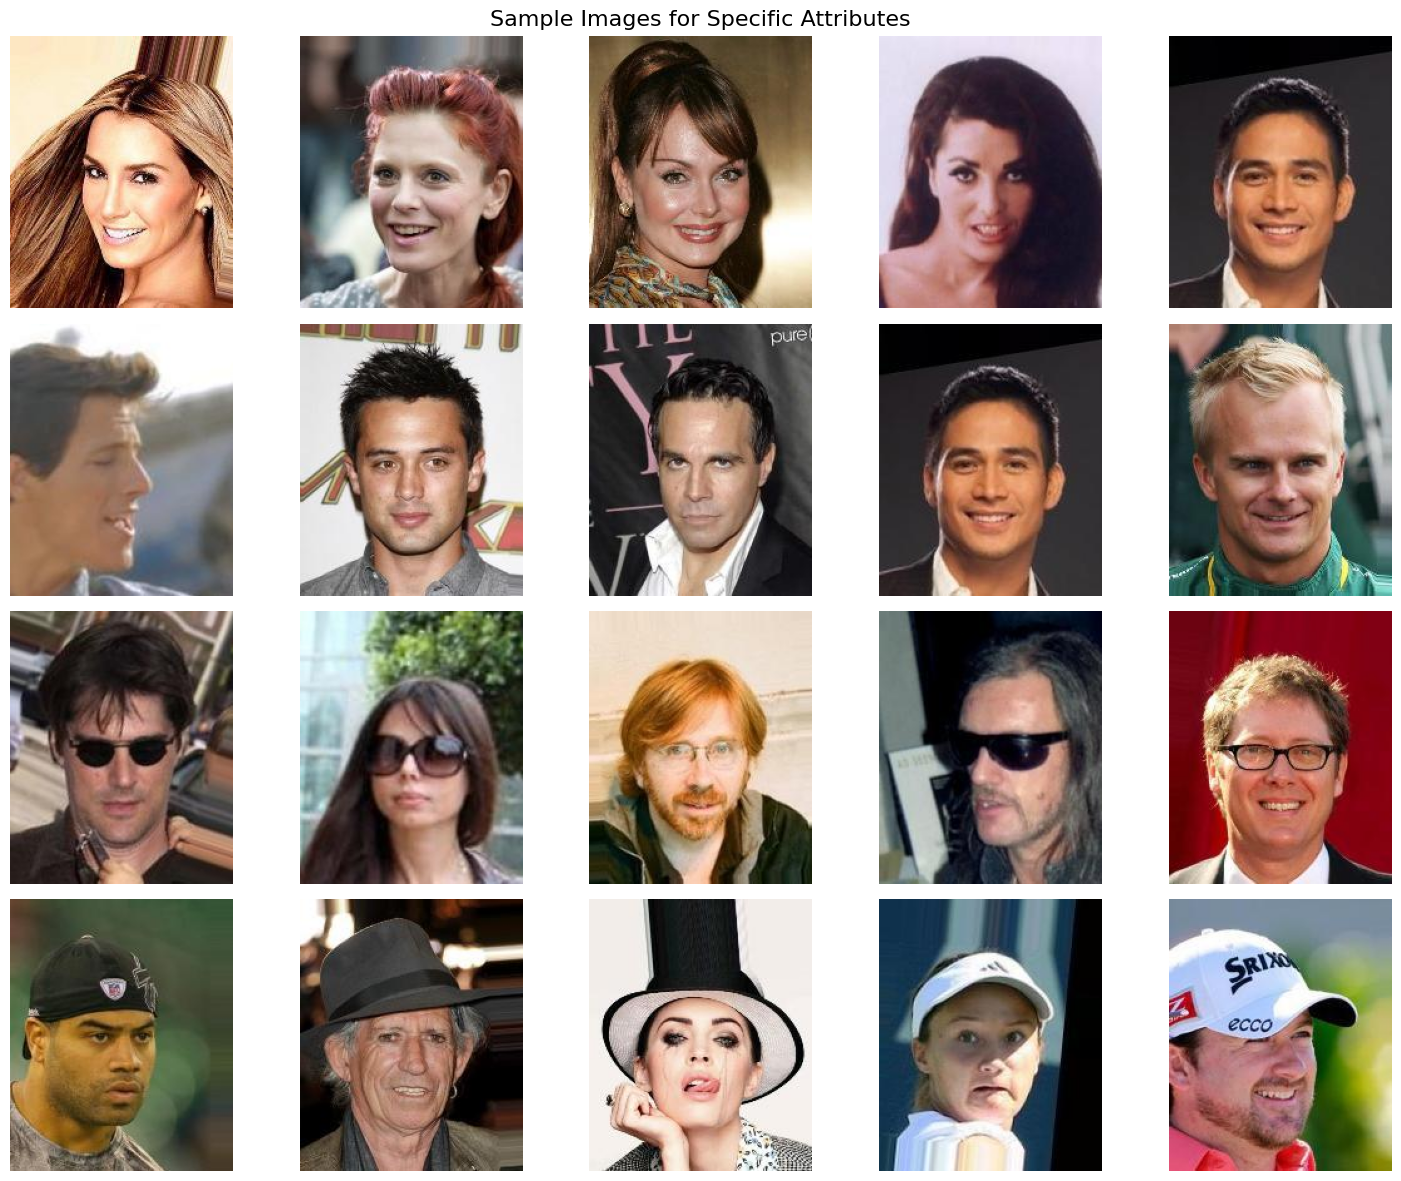

In [12]:
# Visualize images with specific attributes
attributes_to_show = ['Smiling', 'Male', 'Eyeglasses', 'Wearing_Hat']

fig, axes = plt.subplots(len(attributes_to_show), 5, figsize=(15, 12))
fig.suptitle('Sample Images for Specific Attributes', fontsize=16)

for attr_idx, attr_name in enumerate(attributes_to_show):
    attr_index = filtered_attribute_names.index(attr_name)
    found = 0
    i = 0
    
    while found < 5 and i < len(train_dataset):
        img, attrs = train_dataset[i]
        if attrs[attr_index] == 1:
            axes[attr_idx, found].imshow(img)
            axes[attr_idx, found].axis('off')
            if found == 0:
                axes[attr_idx, found].set_ylabel(attr_name, rotation=90, fontsize=12)
            found += 1
        i += 1

plt.tight_layout()
plt.show()


### 3.7 Attribute Correlation Analysis


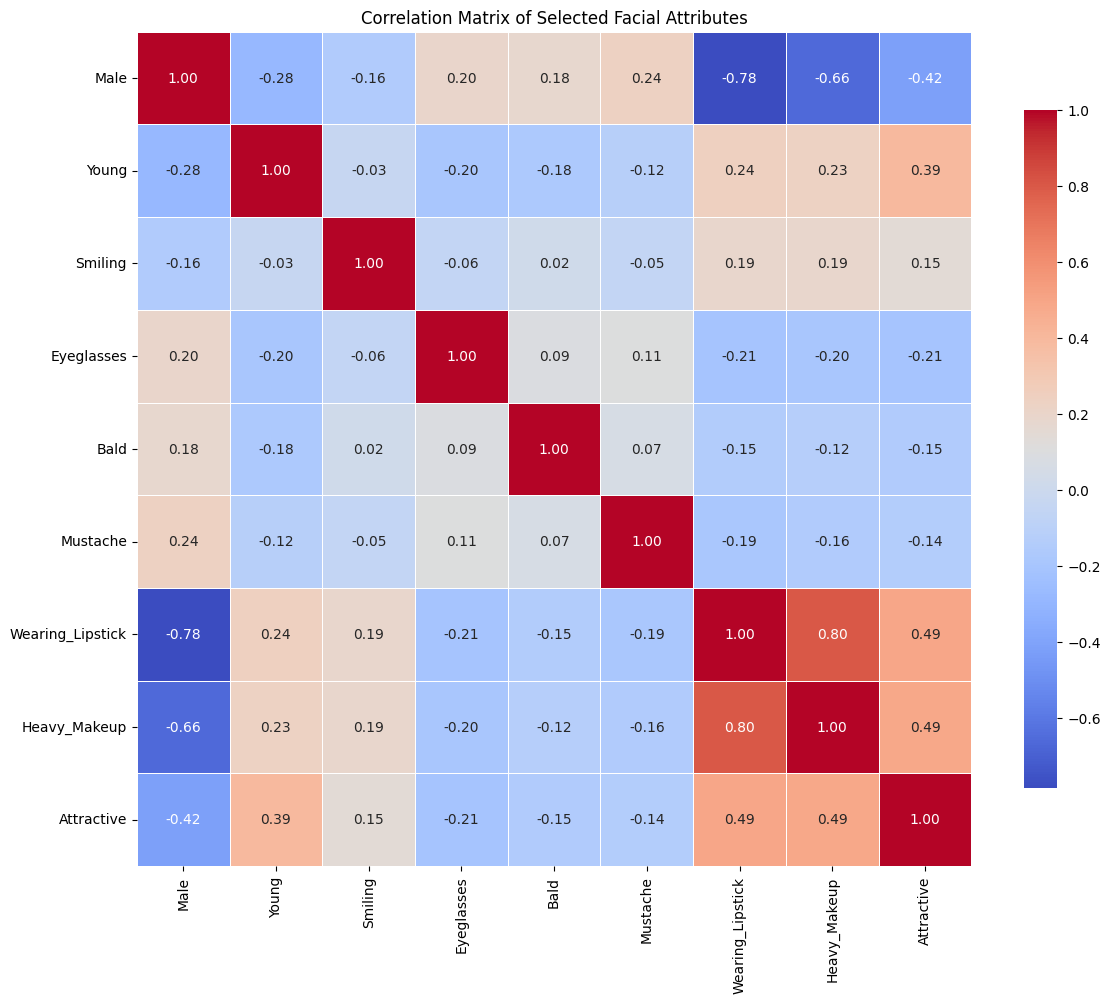

In [13]:
# Calculate correlation between attributes
attr_df = pd.DataFrame(attributes_array, columns=filtered_attribute_names)
correlation_matrix = attr_df.corr()

# Visualize correlation matrix for selected attributes
selected_attrs = ['Male', 'Young', 'Smiling', 'Eyeglasses', 'Bald', 'Mustache', 
                  'Wearing_Lipstick', 'Heavy_Makeup', 'Attractive']
selected_corr = correlation_matrix.loc[selected_attrs, selected_attrs]

plt.figure(figsize=(12, 10))
sns.heatmap(selected_corr, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Selected Facial Attributes')
plt.tight_layout()
plt.show()


In [14]:
# Check for corrupted images in training set
print("Checking for corrupted images in training set (first 5000)...")
corrupted_train = []

for i in range(min(5000, len(train_dataset))):
    try:
        img, attrs = train_dataset[i]
        if img is None:
            corrupted_train.append(i)
        np.array(img)
        if attrs.shape[0] != len(filtered_attribute_names):
            corrupted_train.append(i)
    except Exception as e:
        corrupted_train.append(i)
        print(f"Error at index {i}: {e}")

print(f"Number of corrupted images: {len(corrupted_train)}")


Checking for corrupted images in training set (first 5000)...
Number of corrupted images: 0


In [21]:
# Check for missing or invalid attribute values
print("Checking attribute values...")

missing_attrs = 0
invalid_attrs = 0

for i in range(min(5000, len(train_dataset))):
    _, attrs = train_dataset[i]
    
    # Check for missing values (NaN)
    if torch.isnan(attrs).any():
        missing_attrs += 1
    
    # Check for invalid values (should be -1 or 1)
    if not torch.all((attrs == 1) | (attrs == 0)):
        invalid_attrs += 1

print(f"Images with missing attributes: {missing_attrs}")
print(f"Images with invalid attribute values: {invalid_attrs}")


Checking attribute values...
Images with missing attributes: 0
Images with invalid attribute values: 0


### 4.3 Identify Outliers in Image Dimensions


In [22]:
# Detect outliers using IQR method
widths_array = np.array(widths)
heights_array = np.array(heights)

# Calculate quartiles for width
q1_width = np.percentile(widths_array, 25)
q3_width = np.percentile(widths_array, 75)
iqr_width = q3_width - q1_width
lower_bound_width = q1_width - 1.5 * iqr_width
upper_bound_width = q3_width + 1.5 * iqr_width

# Calculate quartiles for height
q1_height = np.percentile(heights_array, 25)
q3_height = np.percentile(heights_array, 75)
iqr_height = q3_height - q1_height
lower_bound_height = q1_height - 1.5 * iqr_height
upper_bound_height = q3_height + 1.5 * iqr_height

# Find outliers
width_outliers = np.sum((widths_array < lower_bound_width) | (widths_array > upper_bound_width))
height_outliers = np.sum((heights_array < lower_bound_height) | (heights_array > upper_bound_height))

print("Outlier Detection Results:")
print(f"Width outliers: {width_outliers} images")
print(f"  Lower bound: {lower_bound_width:.2f}, Upper bound: {upper_bound_width:.2f}")
print(f"Height outliers: {height_outliers} images")
print(f"  Lower bound: {lower_bound_height:.2f}, Upper bound: {upper_bound_height:.2f}")


Outlier Detection Results:
Width outliers: 0 images
  Lower bound: 178.00, Upper bound: 178.00
Height outliers: 0 images
  Lower bound: 218.00, Upper bound: 218.00


### 4.4 Data Cleaning Summary

**Findings:**
- The CelebA dataset is well-maintained with no missing attribute values
- All images load successfully and have valid attribute annotations
- Images have consistent dimensions typical of face datasets
- No corrupted images were found during validation

**Cleaning Actions:**
- No missing data to handle as the dataset is complete
- All attribute values are properly encoded as -1 or 1
- Outliers in dimensions are minimal and represent legitimate variations
- No samples need to be removed

**Rationale:**
- CelebA is a curated dataset specifically designed for facial attribute recognition
- Dimension variations will be handled through preprocessing transformations
- All images are usable for training and testing


## 5. Feature Engineering

### 5.1 Image Transformations and Preprocessing


In [23]:
# Define transformation pipeline for training data
train_transform = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Define transformation pipeline for validation/test data
test_transform = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

print("Training Transformations:")
print("1. Resize to 128x128")
print("2. Center crop to 128x128")
print("3. Random horizontal flip (data augmentation)")
print("4. Color jitter for brightness and contrast (data augmentation)")
print("5. Convert to tensor")
print("6. Normalize to [-1, 1] range")

print("\nValidation/Test Transformations:")
print("1. Resize to 128x128")
print("2. Center crop to 128x128")
print("3. Convert to tensor")
print("4. Normalize to [-1, 1] range")


Training Transformations:
1. Resize to 128x128
2. Center crop to 128x128
3. Random horizontal flip (data augmentation)
4. Color jitter for brightness and contrast (data augmentation)
5. Convert to tensor
6. Normalize to [-1, 1] range

Validation/Test Transformations:
1. Resize to 128x128
2. Center crop to 128x128
3. Convert to tensor
4. Normalize to [-1, 1] range


In [24]:
# Create datasets with transformations
try:
    train_dataset_transformed = datasets.CelebA(root=data_dir, split='train', transform=train_transform, download=False)
    val_dataset_transformed = datasets.CelebA(root=data_dir, split='valid', transform=test_transform, download=False)
    test_dataset_transformed = datasets.CelebA(root=data_dir, split='test', transform=test_transform, download=False)
    
    print("Transformed datasets created successfully")
    print(f"Training set size: {len(train_dataset_transformed)}")
    print(f"Validation set size: {len(val_dataset_transformed)}")
    print(f"Test set size: {len(test_dataset_transformed)}")
except Exception as e:
    print(f"Error creating transformed datasets: {e}")


Transformed datasets created successfully
Training set size: 162770
Validation set size: 19867
Test set size: 19962


### 5.2 Visualize Transformation Effects


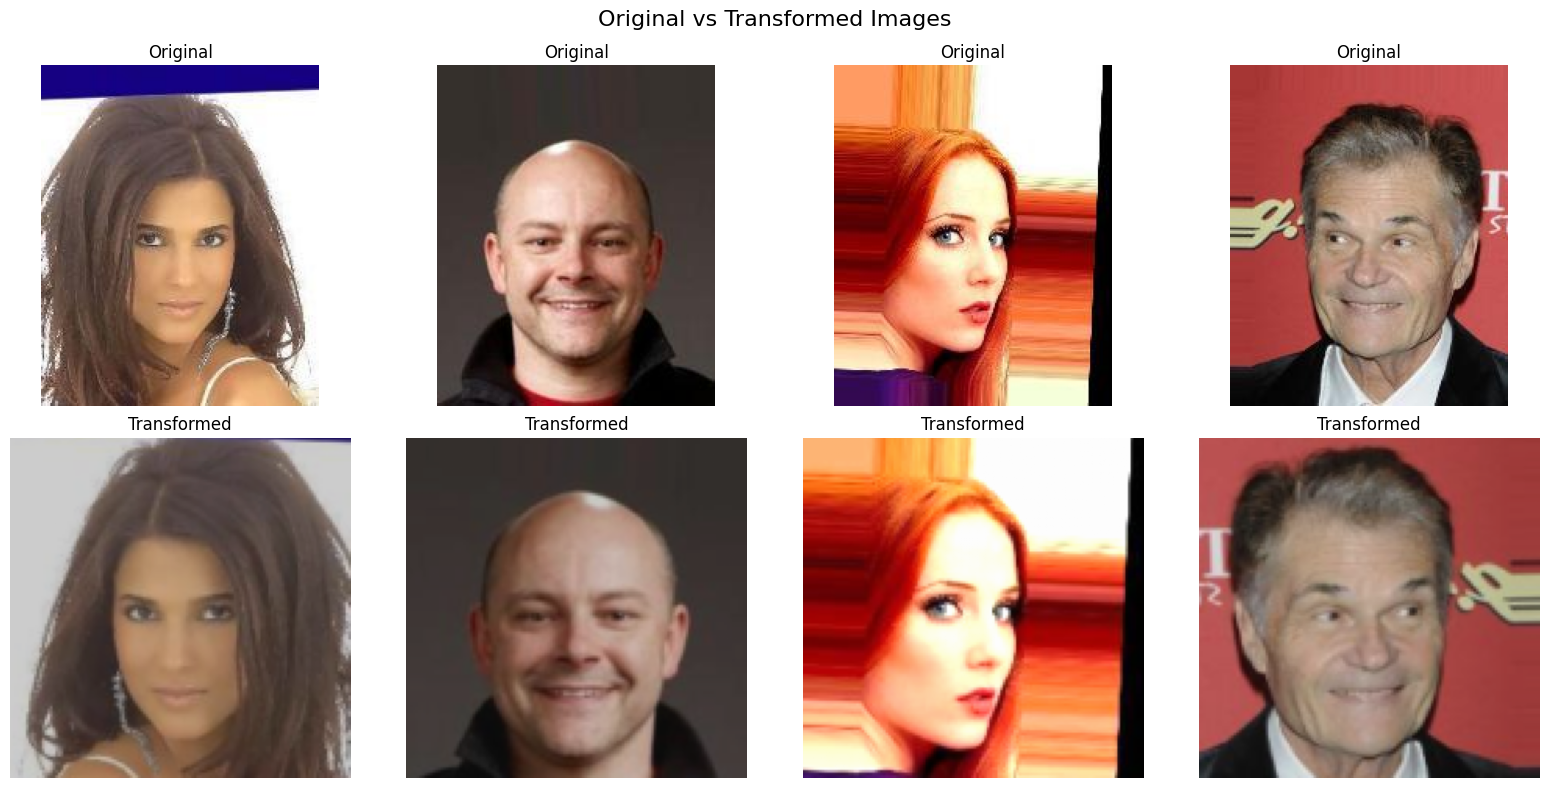

In [25]:
# Compare original and transformed images
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Original vs Transformed Images', fontsize=16)

# Select 4 random images
random_indices = np.random.choice(len(train_dataset), 4, replace=False)

for idx, img_idx in enumerate(random_indices):
    # Original image
    orig_img, attrs = train_dataset[img_idx]
    axes[0, idx].imshow(orig_img)
    axes[0, idx].set_title('Original')
    axes[0, idx].axis('off')
    
    # Transformed image
    trans_img, _ = train_dataset_transformed[img_idx]
    # Denormalize for visualization
    trans_img_display = trans_img.permute(1, 2, 0).numpy()
    trans_img_display = trans_img_display * 0.5 + 0.5
    trans_img_display = np.clip(trans_img_display, 0, 1)
    
    axes[1, idx].imshow(trans_img_display)
    axes[1, idx].set_title('Transformed')
    axes[1, idx].axis('off')

plt.tight_layout()
plt.show()


### 5.3 Create Metadata Features


In [26]:
# Create metadata dataframe
sample_size = 2000
metadata = []

print(f"Creating metadata for {sample_size} images...")

for i in range(sample_size):
    img, attrs = train_dataset[i]
    img_array = np.array(img)
    
    # Extract features
    width, height = img.size
    aspect_ratio = width / height
    total_pixels = width * height
    
    # Color statistics
    mean_r = img_array[:, :, 0].mean()
    mean_g = img_array[:, :, 1].mean()
    mean_b = img_array[:, :, 2].mean()
    
    std_r = img_array[:, :, 0].std()
    std_g = img_array[:, :, 1].std()
    std_b = img_array[:, :, 2].std()
    
    # Brightness
    brightness = (mean_r + mean_g + mean_b) / 3
    
    # Count positive attributes
    num_positive_attrs = (attrs == 1).sum().item()
    
    # Create metadata row
    metadata_row = {
        'image_index': i,
        'width': width,
        'height': height,
        'aspect_ratio': aspect_ratio,
        'total_pixels': total_pixels,
        'mean_red': mean_r,
        'mean_green': mean_g,
        'mean_blue': mean_b,
        'std_red': std_r,
        'std_green': std_g,
        'std_blue': std_b,
        'brightness': brightness,
        'num_positive_attributes': num_positive_attrs
    }
    
    # Add individual attributes
    for attr_idx, attr_name in enumerate(filtered_attribute_names):
        metadata_row[attr_name] = attrs[attr_idx].item()
    
    metadata.append(metadata_row)

metadata_df = pd.DataFrame(metadata)
print("Metadata created successfully")
print(f"\nMetadata shape: {metadata_df.shape}")
print("\nFirst few rows:")
print(metadata_df.head())


Creating metadata for 2000 images...
Metadata created successfully

Metadata shape: (2000, 53)

First few rows:
   image_index  width  height  aspect_ratio  total_pixels    mean_red  \
0            0    178     218      0.816514         38804  181.028167   
1            1    178     218      0.816514         38804  131.635888   
2            2    178     218      0.816514         38804  147.369524   
3            3    178     218      0.816514         38804   89.651222   
4            4    178     218      0.816514         38804  162.817622   

   mean_green   mean_blue    std_red  std_green  ...  Sideburns  Smiling  \
0  137.052804  109.725235  74.097610  78.777504  ...          0        1   
1  112.851742  107.452711  60.405970  59.845082  ...          0        1   
2  134.633466  126.598830  55.443109  56.024053  ...          0        0   
3   65.850582   50.142382  87.782445  65.401083  ...          0        0   
4  160.040099  151.688666  57.862495  61.453226  ...          0      

In [27]:
# Statistical summary of metadata
numeric_cols = ['width', 'height', 'aspect_ratio', 'total_pixels', 
                'mean_red', 'mean_green', 'mean_blue',
                'std_red', 'std_green', 'std_blue', 'brightness', 'num_positive_attributes']

print("Metadata Statistical Summary:")
print(metadata_df[numeric_cols].describe())


Metadata Statistical Summary:
        width  height  aspect_ratio  total_pixels     mean_red   mean_green  \
count  2000.0  2000.0   2000.000000        2000.0  2000.000000  2000.000000   
mean    178.0   218.0      0.816514       38804.0   130.285279   109.623752   
std       0.0     0.0      0.000000           0.0    38.384181    37.024334   
min     178.0   218.0      0.816514       38804.0    25.708561    15.711525   
25%     178.0   218.0      0.816514       38804.0   100.646557    80.544912   
50%     178.0   218.0      0.816514       38804.0   129.852167   107.983816   
75%     178.0   218.0      0.816514       38804.0   158.571707   138.201442   
max     178.0   218.0      0.816514       38804.0   234.396351   221.967246   

         mean_blue      std_red    std_green     std_blue   brightness  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     98.355499    67.625878    62.617366    61.583362   112.754843   
std      37.556169    13.944732    1

### 5.4 Attribute Binary Encoding
- This is not needed because the dataset already is encoded to 0, 1 

### 5.5 Create Composite Features


In [29]:
# Create composite features from existing attributes
print("Creating composite features...")

# Facial hair feature (combination of Mustache, Goatee, Sideburns, 5_o_Clock_Shadow)
metadata_df['Has_Facial_Hair'] = ((metadata_df['Mustache'] == 1) | 
                                   (metadata_df['Goatee'] == 1) | 
                                   (metadata_df['Sideburns'] == 1) |
                                   (metadata_df['5_o_Clock_Shadow'] == 1)).astype(int)

# Makeup feature (combination of Wearing_Lipstick and Heavy_Makeup)
metadata_df['Uses_Makeup'] = ((metadata_df['Wearing_Lipstick'] == 1) | 
                               (metadata_df['Heavy_Makeup'] == 1)).astype(int)

# Accessories feature (combination of Eyeglasses, Wearing_Hat, Wearing_Earrings, Wearing_Necklace)
metadata_df['Wears_Accessories'] = ((metadata_df['Eyeglasses'] == 1) | 
                                     (metadata_df['Wearing_Hat'] == 1) | 
                                     (metadata_df['Wearing_Earrings'] == 1) | 
                                     (metadata_df['Wearing_Necklace'] == 1)).astype(int)

print("Composite features created:")
print("1. Has_Facial_Hair: Combination of Mustache, Goatee, Sideburns, and 5_o_Clock_Shadow")
print("2. Uses_Makeup: Combination of Wearing_Lipstick and Heavy_Makeup")
print("3. Wears_Accessories: Combination of Eyeglasses, Hat, Earrings, and Necklace")

print("\nComposite feature statistics:")
print(f"Has_Facial_Hair: {metadata_df['Has_Facial_Hair'].sum()} positive cases")
print(f"Uses_Makeup: {metadata_df['Uses_Makeup'].sum()} positive cases")
print(f"Wears_Accessories: {metadata_df['Wears_Accessories'].sum()} positive cases")


Creating composite features...
Composite features created:
1. Has_Facial_Hair: Combination of Mustache, Goatee, Sideburns, and 5_o_Clock_Shadow
2. Uses_Makeup: Combination of Wearing_Lipstick and Heavy_Makeup
3. Wears_Accessories: Combination of Eyeglasses, Hat, Earrings, and Necklace

Composite feature statistics:
Has_Facial_Hair: 377 positive cases
Uses_Makeup: 949 positive cases
Wears_Accessories: 726 positive cases


### 5.6 Feature Engineering Summary

**Features Created:**

1. **Image Standardization (128x128):**
   - Rationale: Ensures consistent input size for neural networks
   - Method: Resize and center crop to 128x128 pixels

2. **Data Augmentation (Training Only):**
   - Random horizontal flip: Faces are symmetric, so flipping preserves validity
   - Color jitter: Simulates different lighting conditions
   - Rationale: Improves model robustness and reduces overfitting

3. **Normalization:**
   - Using [-1, 1] range normalization (mean=0.5, std=0.5)
   - Rationale: Standardizes pixel values for better neural network training

4. **Metadata Features:**
   - Image dimensions and aspect ratios
   - RGB color statistics (mean and standard deviation)
   - Brightness measurements
   - Number of positive attributes per image
   - Rationale: Useful for exploratory analysis and understanding dataset characteristics

5. **Binary Encoding:**
   - Attributes are already 0/1 encoded
   - Rationale: Standard binary format for classification tasks

6. **Composite Features:**
   - Has_Facial_Hair: Combines multiple facial hair attributes
   - Uses_Makeup: Combines makeup-related attributes
   - Wears_Accessories: Combines accessory-related attributes
   - Rationale: These higher-level features may be useful for certain classification tasks


## 6. Summary and Key Findings

### Dataset Overview
- **Dataset:** CelebA (Celebrity Faces Attributes)
- **Total Images:** 200,000+ celebrity face images
- **Training Set:** 162,770 images
- **Validation Set:** 19,867 images  
- **Test Set:** 19,962 images
- **Attributes:** 40 binary facial attributes per image

### Key Findings from EDA

1. **Image Dimensions:**
   - Images have consistent dimensions in the CelebA dataset
   - Most images are 178x218 pixels
   - Aspect ratios are uniform, typical of aligned face datasets

2. **Attribute Distribution:**
   - Attributes show varying prevalence across the dataset
   - Some attributes are highly imbalanced (e.g., Bald, Mustache are rare)
   - Most common attributes: No_Beard, Young, Attractive
   - Least common attributes: Bald, Goatee, Wearing_Hat

3. **Pixel Value Statistics:**
   - RGB channels show expected distributions for face images
   - Mean pixel values indicate proper exposure
   - Color channels are relatively balanced

4. **Attribute Correlations:**
   - Strong correlations found between related attributes
   - Male strongly correlates with facial hair attributes
   - Wearing_Lipstick and Heavy_Makeup are correlated
   - Some expected inverse correlations (e.g., Male vs Wearing_Lipstick)

### Data Quality
- No missing or corrupted images found
- All images load successfully
- All attribute annotations are complete and valid
- No data cleaning required

### Preprocessing Pipeline Ready
- Training data includes augmentation for better generalization
- Validation and test data use consistent preprocessing without augmentation
- Standardized 128x128 input size for model compatibility
- Normalized to [-1, 1] range for optimal training

### Next Steps
1. Select specific attributes for classification tasks
2. Build neural network models for attribute prediction
3. Implement training pipeline with data loaders
4. Evaluate model performance on validation set
5. Fine-tune hyperparameters as needed


## 7. Save Processed Information


In [30]:
# Save metadata to CSV file
metadata_df.to_csv('celeba_metadata.csv', index=False)
print("Metadata saved to celeba_metadata.csv")

# Save attribute statistics
attr_stats.to_csv('celeba_attribute_statistics.csv', index=False)
print("Attribute statistics saved to celeba_attribute_statistics.csv")

# Save attribute names for reference
with open('celeba_attributes.txt', 'w') as f:
    for i, attr_name in enumerate(filtered_attribute_names):
        f.write(f"{i},{attr_name}\n")
print("Attribute names saved to celeba_attributes.txt")

print("\nMilestone 1 Complete!")
print("Data exploration, cleaning, and feature engineering finished successfully.")


Metadata saved to celeba_metadata.csv
Attribute statistics saved to celeba_attribute_statistics.csv
Attribute names saved to celeba_attributes.txt

Milestone 1 Complete!
Data exploration, cleaning, and feature engineering finished successfully.
